# Imports

In [3]:
# For data analysis and data structures in DataFrames
import pandas as pd
# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import json as JSON
import collections 


# Setup dataframe

In [4]:
# Load dataset
df = pd.read_csv('media_bias.csv')

number_of_data_points_with_biased_words = 0
number_of_biased_words = 0
# Plot the distribution of the amount of biased_words in the dataset
#for biased_words in df['biased_words4']:
df['biased_words'] = ''
for i in range(0, len(df['biased_words4'])):
    # Remove characters from the string
    # so that it can be converted from a string
    # to an array of strings
    df['biased_words'][i] = np.array(df['biased_words4'][i].replace('[', '').replace(']', '').replace("'", '').split(', '))
    # print(df['biased_words'][i])

df.drop(columns=['biased_words4'], inplace=True)

/tmp/ipykernel_82585/1990659903.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['biased_words'][i] = np.array(df['biased_words4'][i].replace('[', '').replace(']', '').replace("'", '').split(', '))


<AxesSubplot: >

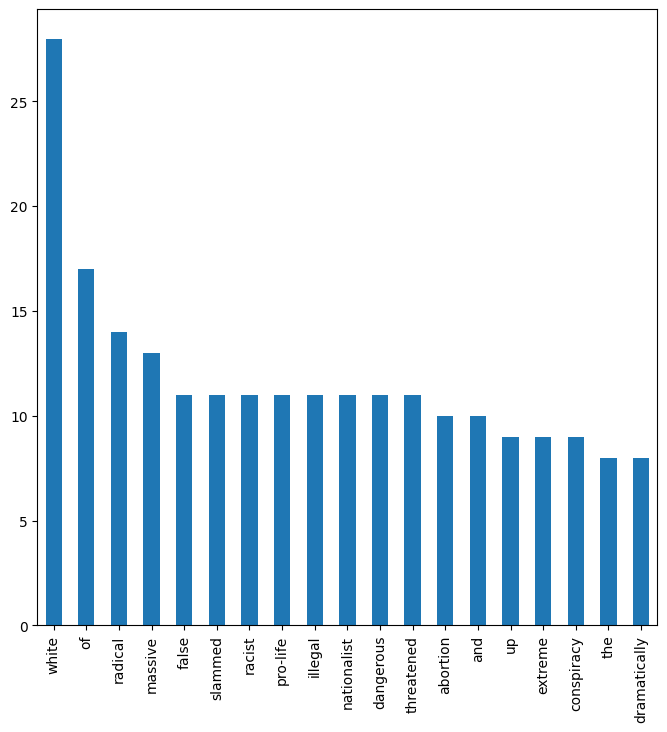

In [5]:
# Find unique values and display the largest 20 in a 
df['biased_words'].explode().value_counts()[1:20].plot.bar(figsize=(8,8))

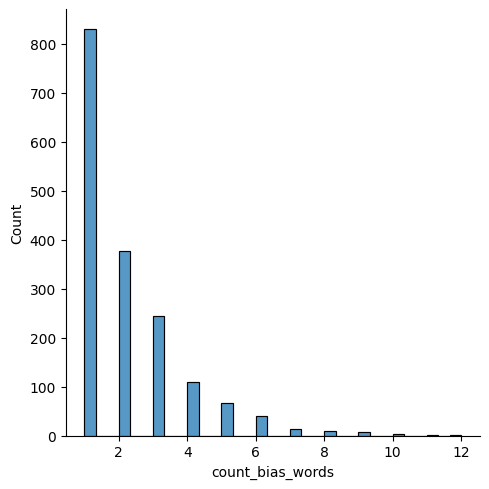

<bound method NDFrame.head of 0       2
1       1
2       1
3       1
4       5
       ..
1695    4
1696    2
1697    1
1698    1
1699    1
Name: count_bias_words, Length: 1700, dtype: int64>

In [6]:
#print(len(df['biased_words4'][0:]))
df['count_bias_words'] = df['biased_words'].map(len)
# df['count_bias_words'].plot(kind='kde')
# plt.show()
sns.displot(df['count_bias_words'])
plt.show()

df['count_bias_words'].head

# Correlation checks

## Topic and label_bias

In [7]:
# Correlation between bias label and Topic feature in general

# Make a copy of the data frame so that columns are not overwritten with
# numeric values.
dfCopy = df.copy()

dfCopy['topic'] = dfCopy['topic'].astype('category').cat.codes
dfCopy['Label_bias'] = dfCopy['Label_bias'].astype('category').cat.codes
dfCopy.corr()['Label_bias']['topic']


/tmp/ipykernel_82585/1125092929.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCopy.corr()['Label_bias']['topic']


-0.03312874060844754

In [8]:
# Correlation between bias label and each topic value
s_corr = df.topic.str.get_dummies().corrwith(df['Label_bias'].astype('category').cat.codes)
print(s_corr)


abortion                                -0.051860
coronavirus                              0.002015
elections-2020                          -0.024377
environment                              0.017935
gender                                   0.055068
gun-control                              0.005897
immigration                              0.029517
international-politics-and-world-news    0.026522
middle-class                            -0.013546
sport                                    0.145206
student-debt                             0.005479
trump-presidency                        -0.085066
vaccines                                -0.015487
white-nationalism                       -0.095884
dtype: float64


## outlet and label_bias

In [9]:
# Correlation between bias label and outlet feature in general

# Make a copy of the data frame so that columns are not overwritten with
# numeric values.
dfCopy = df.copy()

dfCopy['outlet'] = dfCopy['outlet'].astype('category').cat.codes
dfCopy['Label_bias'] = dfCopy['Label_bias'].astype('category').cat.codes
dfCopy.corr()['Label_bias']['outlet']

/tmp/ipykernel_82585/2478416612.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCopy.corr()['Label_bias']['outlet']


0.3406574522875378

In [11]:
# Correlation between bias label and each outlet value
s_corr = df.outlet.str.get_dummies().corrwith(df['Label_bias'].astype('category').cat.codes)
print(s_corr)

alternet     -0.214343
breitbart    -0.014670
federalist   -0.199169
fox-news      0.069658
huffpost     -0.057987
msnbc         0.066561
reuters       0.246866
usa-today     0.202358
dtype: float64


## type and label_bias

In [12]:
# Correlation between bias label and type feature in general

# Make a copy of the data frame so that columns are not overwritten with
# numeric values.
dfCopy = df.copy()

dfCopy['type'] = dfCopy['type'].astype('category').cat.codes
dfCopy['Label_bias'] = dfCopy['Label_bias'].astype('category').cat.codes
dfCopy.corr()['Label_bias']['type']

/tmp/ipykernel_82585/666644678.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCopy.corr()['Label_bias']['type']


-0.24937625866900645

In [13]:
# Correlation between bias label and each type value
s_corr = df.type.str.get_dummies().corrwith(df['Label_bias'].astype('category').cat.codes)
print(s_corr)

center    0.335271
left     -0.156243
right    -0.108863
dtype: float64


In [10]:
test1=pd.get_dummies(df,columns=['sentence']).corr(df['Label_bias'], numeric_only=True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().